# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Preprocesamiento

In [3]:
df = pd.read_csv('/kaggle/input/penguins/penguins.csv')

In [4]:
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## 2.2. Preprocesamiento

### Eliminación de columnas

Se elimina la columna 'Unnamed: 0', ya que no es necesario dentro del analisis.

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


## 2.3. Generación de dataframe para cada especie

Estos dataframes se utilizarán en el analisis multivariado

In [7]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [8]:
filt = (df['species'] == 'Adelie')
df_adelie = df.loc[filt]

In [9]:
filt = (df['species'] == 'Gentoo')
df_gentoo = df.loc[filt]

In [10]:
filt = (df['species'] == 'Chinstrap')
df_chinstrap = df.loc[filt]

# 3. Exploración inicial del dataframe

### Dimensión del dataframe

In [11]:
df.shape

(344, 8)

### Balance del dataset

In [12]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Comprobación de valores faltantes

In [13]:
df.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### Estimación de la asimetría (Skewness)

In [14]:
df.drop(['species', 'island', 'sex'], axis=1).skew()

bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
year                -0.053728
dtype: float64

### Estimación de la curtosis

In [15]:
df.drop(['species', 'island', 'sex'], axis=1).kurt()

bill_length_mm      -0.876027
bill_depth_mm       -0.906866
flipper_length_mm   -0.984273
body_mass_g         -0.719222
year                -1.504937
dtype: float64

### Info. general del dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


# 4. Análisis Univariado

## 4.1. Variables categóricas

### 4.1.1. Proporción

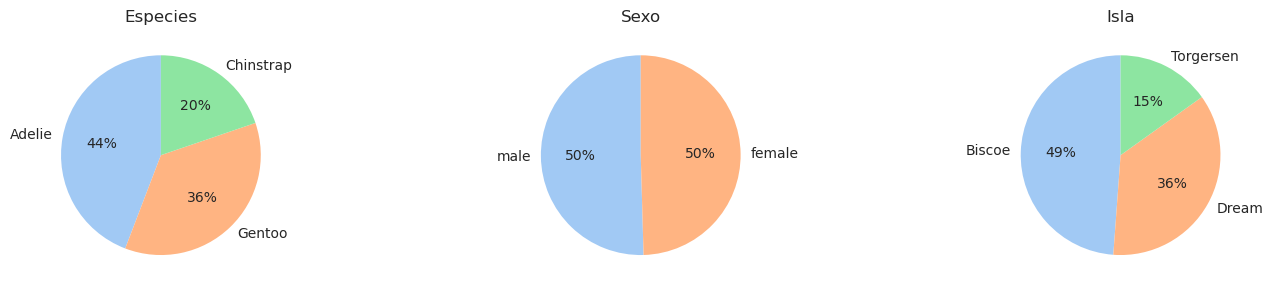

In [17]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(15, 3))

ax0 = plt.subplot2grid((1, 3),(0,0))
count = df['species'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Especies')

ax1 = plt.subplot2grid((1, 3), (0, 1))
count = df['sex'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Sexo')

ax2 = plt.subplot2grid((1, 3), (0, 2))
count = df['island'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Isla')

plt.tight_layout()

### 4.1.2. Tendencias por año

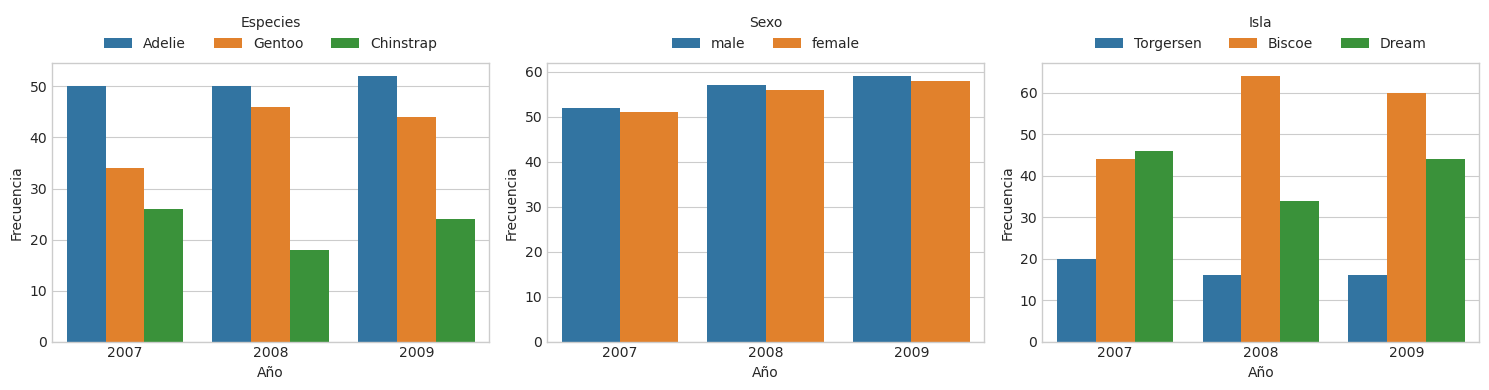

In [18]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.countplot(data=df, x='year', hue='species', ax=ax[0])
ax[0].set_ylabel('Frecuencia')
ax[0].set_xlabel('Año')
sns.move_legend(ax[0], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Especies', frameon=False)

sns.countplot(data=df, x='year', hue='sex', ax=ax[1])
ax[1].set_ylabel('Frecuencia')
ax[1].set_xlabel('Año')
sns.move_legend(ax[1], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Sexo', frameon=False)

sns.countplot(data=df, x='year', hue='island', ax=ax[2])
ax[2].set_ylabel('Frecuencia')
ax[2].set_xlabel('Año')
sns.move_legend(ax[2], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Isla', frameon=False)

plt.tight_layout()

## 4.2. Variables númericas

In [19]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### 4.2.1. Longitud del Pico [mm]

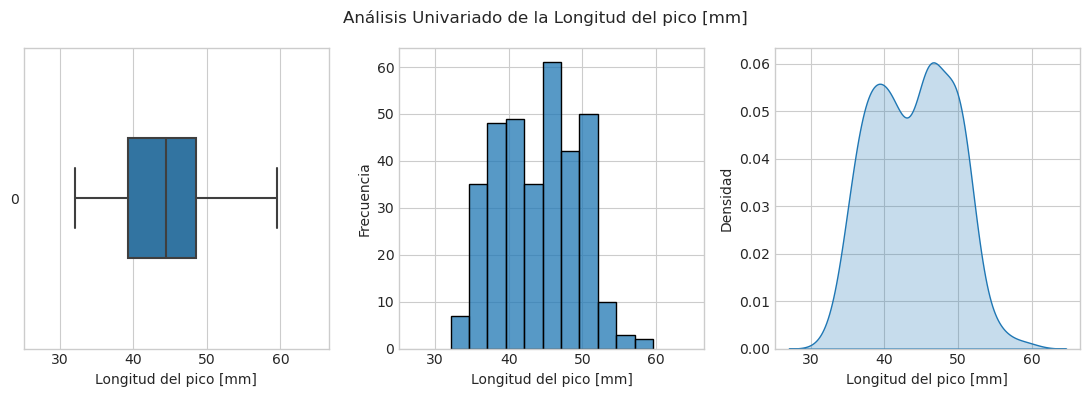

In [20]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.2. Profundidad del Pico [mm]

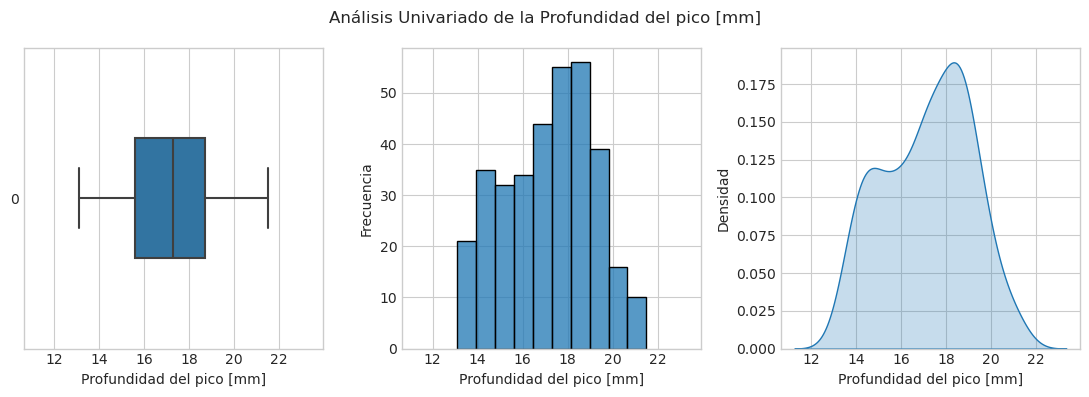

In [21]:
var = 'bill_depth_mm'
var_title = 'Profundidad del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.3. Longitud de la aleta [mm]

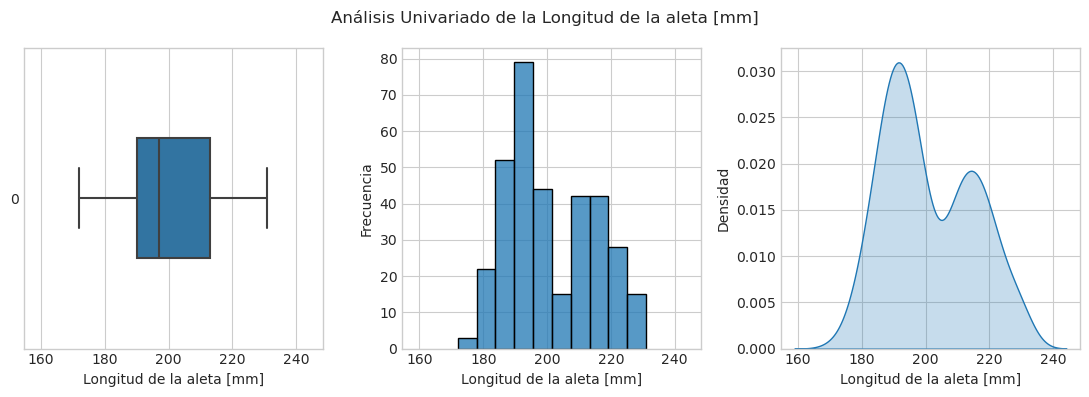

In [22]:
var = 'flipper_length_mm'
var_title = 'Longitud de la aleta [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.4. Masa corporal [g]

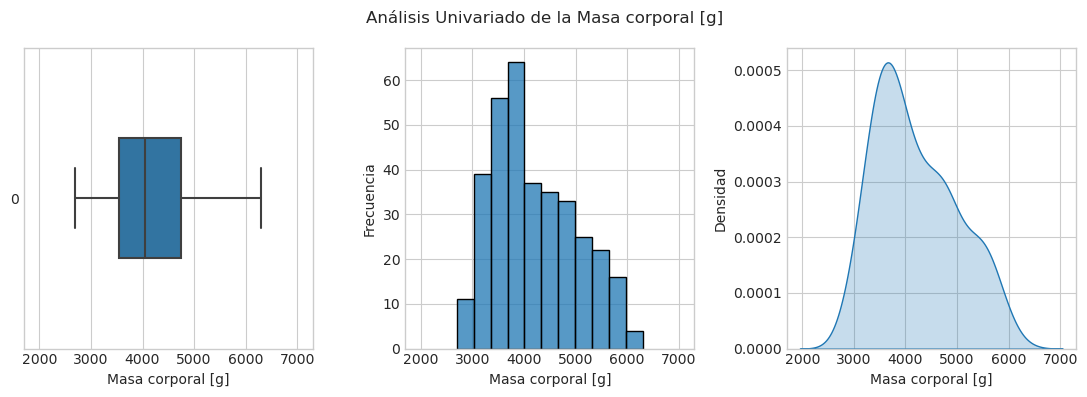

In [23]:
var = 'body_mass_g'
var_title = 'Masa corporal [g]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# 5. Análisis Multivariado

## 5.1. Longitud del Pico [mm] vs Especies

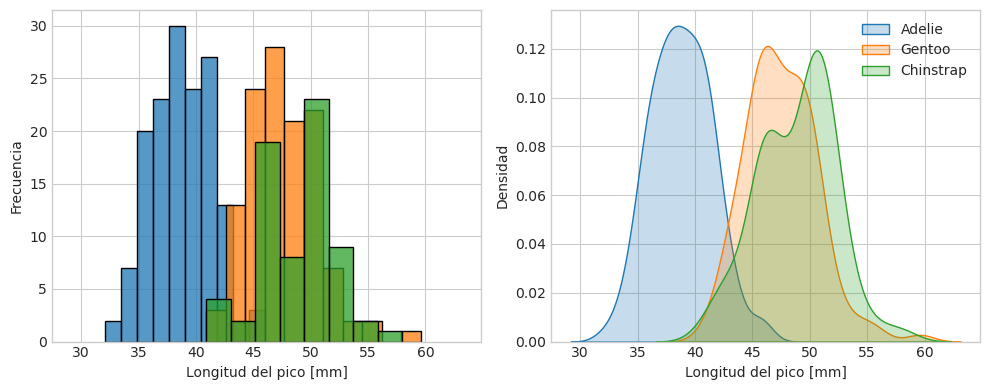

In [24]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

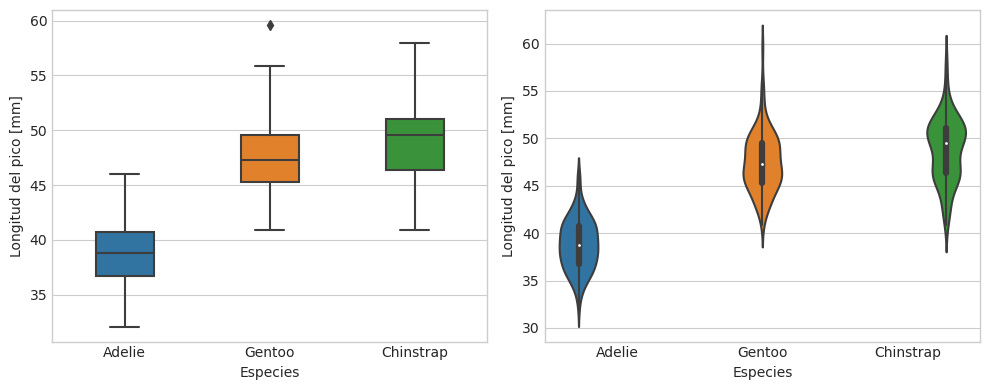

In [25]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()



plt.tight_layout()

## 5.2. Profundidad del Pico [mm] vs Especies

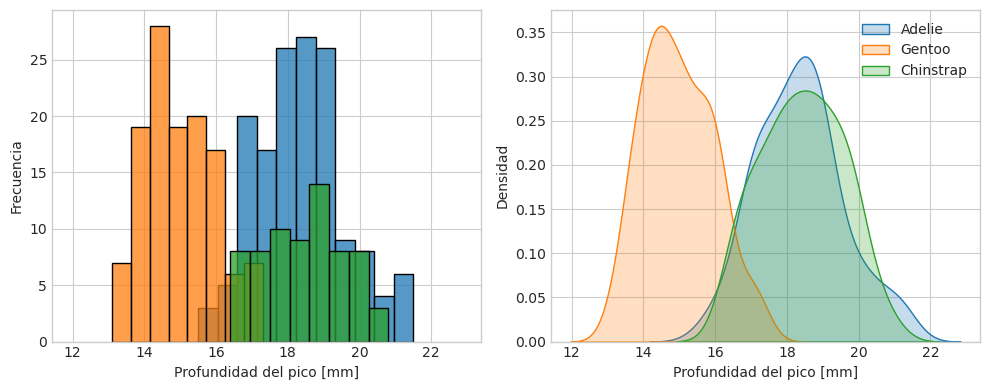

In [26]:
var = 'bill_depth_mm'
var_title = 'Profundidad del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

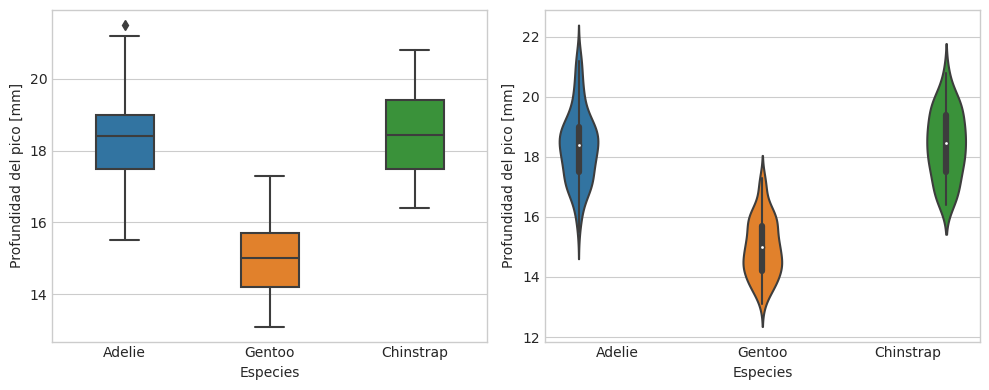

In [27]:
var = 'bill_depth_mm'
var_title = 'Profundidad del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()



plt.tight_layout()

## 5.3. Longitud de la aleta [mm] vs Especies

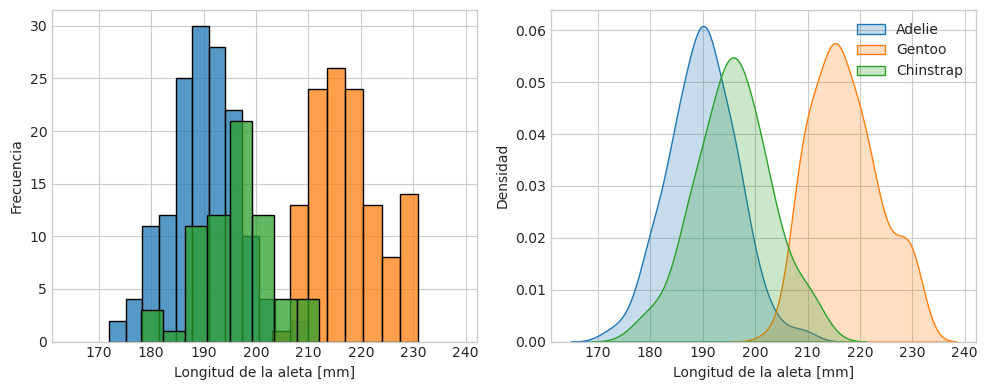

In [28]:
var = 'flipper_length_mm'
var_title = 'Longitud de la aleta [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

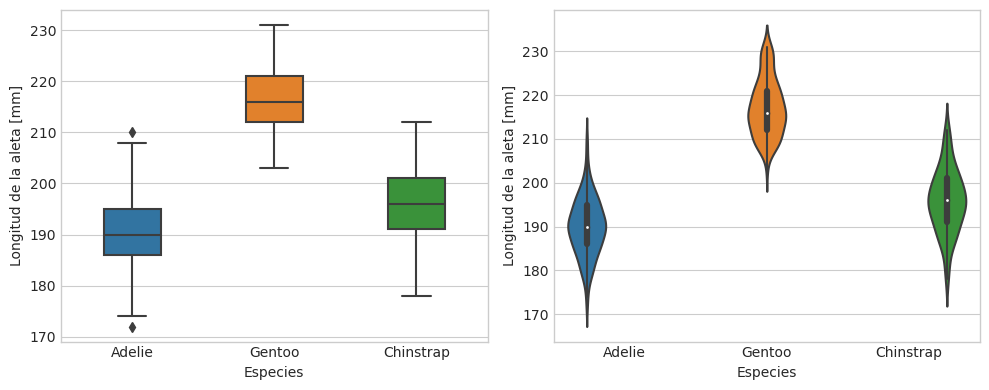

In [29]:
var = 'flipper_length_mm'
var_title = 'Longitud de la aleta [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()



plt.tight_layout()

## 5.1. Masa corporal [g] vs Especies

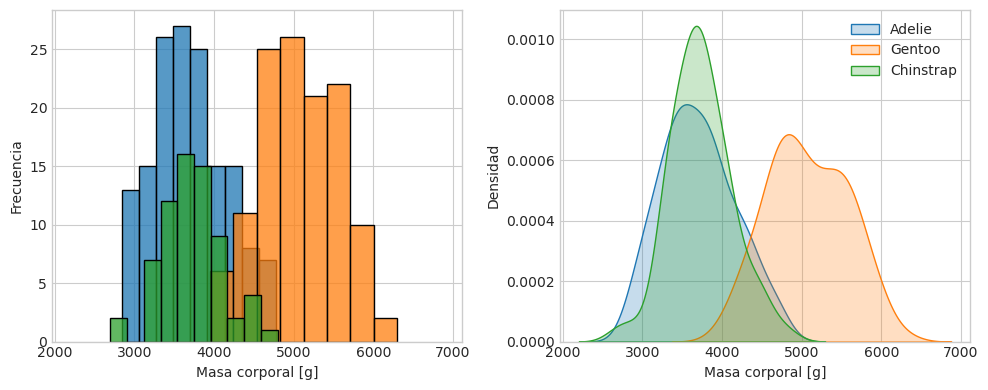

In [30]:
var = 'body_mass_g'
var_title = 'Masa corporal [g]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

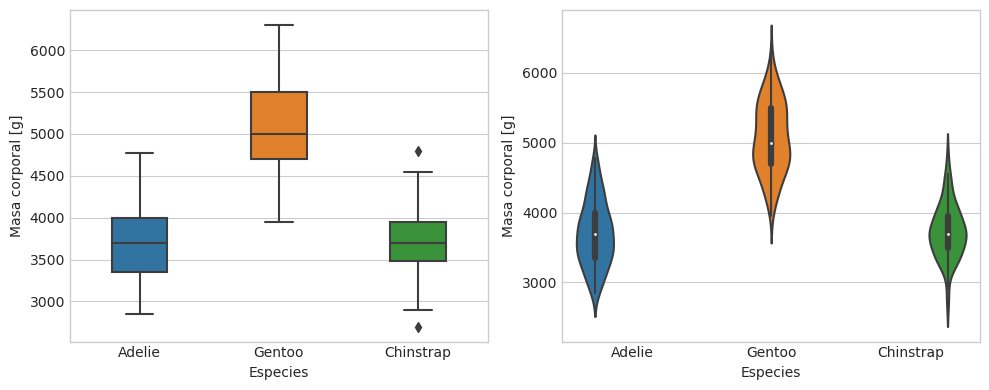

In [31]:
var = 'body_mass_g'
var_title = 'Masa corporal [g]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)
ax[1].get_legend().remove()



plt.tight_layout()

# 6. Conclusiones EDA